#Using EfficientNetB0 for making food 101 ML Model to scan a food

#IMPORT LIBRARIES

This is the libraries which will be needed or not to use in NutriBalance

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras import mixed_precision
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
# This codes are to check the version of libraries
print("The numpy version is " + np.__version__)
print("The tensorflow version is " + tf.__version__)
print("The pandas version is " + pd.__version__)

The numpy version is 1.23.5
The tensorflow version is 2.15.0
The pandas version is 1.5.3


##DATA COLLECTING

We use TensorFlow Dataset Food101

In [3]:
dataset_food101 = tfds.list_builders()
print("food101" in dataset_food101)

True


In [4]:
#import dataset food101 from Tensorflow Dataset
(train_data, validation_data), ds_info = tfds.load(name="food101",
                                             split=["train","validation"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteGMBJGW/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteGMBJGW/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


This is the figure of train data


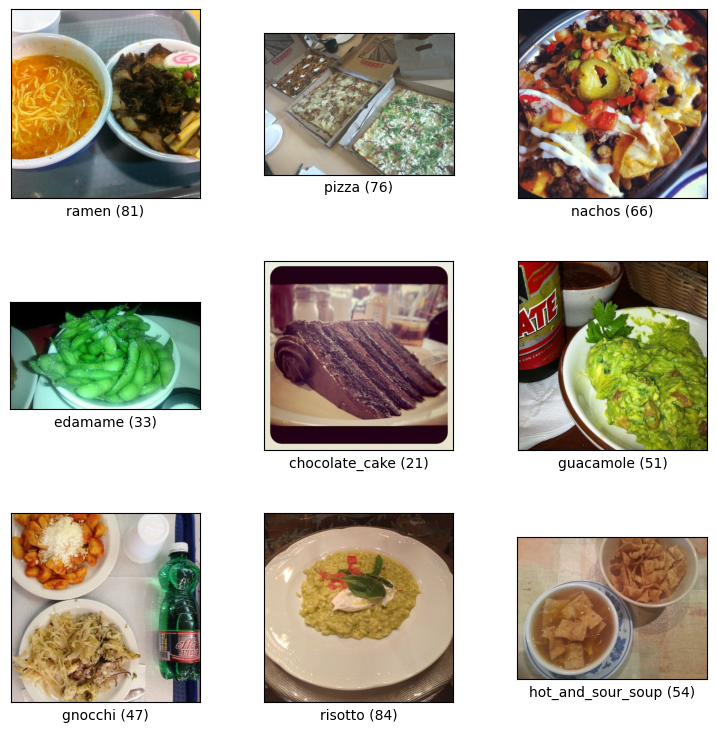

In [5]:
print('This is the figure of train data')
figure_of_train_data = tfds.show_examples(train_data, ds_info)

This is the figure of validation data


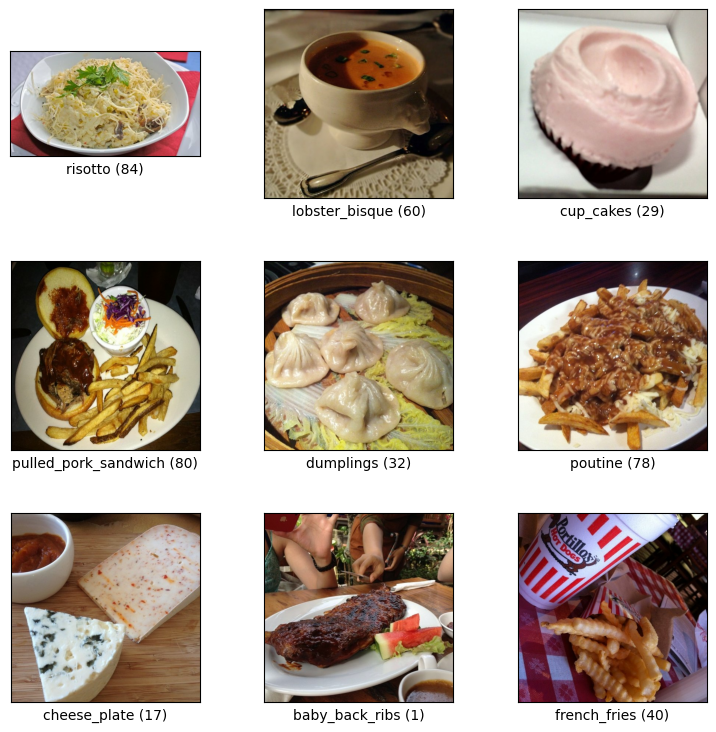

In [6]:
print('This is the figure of validation data')
figure_of_validation_data = tfds.show_examples(validation_data, ds_info)

In [7]:
#This is show the features of dictionary
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [8]:
#This is the example of class names
class_names = ds_info.features["label"].names
ten_first_classes =  class_names[:10]
ten_second_classes = class_names[10:20]
ten_third_classes = class_names[20:30]
ten_fourth_classes = class_names[30:40]
ten_fifth_classes = class_names[40:50]
ten_sixth_classes = class_names[50:60]
ten_seventh_classes = class_names[60:70]
ten_eigth_classes = class_names[70:80]
ten_ninth_classes = class_names[80:90]
ten_tenth_classes = class_names[90:100]
last_one_classes = class_names[100]
print("This is the class names")
print(ten_first_classes)
print(ten_second_classes)
print(ten_third_classes)
print(ten_fourth_classes)
print(ten_fifth_classes)
print(ten_sixth_classes)
print(ten_seventh_classes)
print(ten_eigth_classes)
print(ten_ninth_classes)
print(ten_tenth_classes)
print(last_one_classes)

This is the class names
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']
['bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla']
['chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes']
['deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras']
['french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich']
['grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna']
['lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_

In [9]:
print('taking one example of train data')
train_sample = train_data.take(1)
train_sample

taking one example of train data


<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
for image, label in train_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class: {label}
  Class name: {class_names[label.numpy()]}
  """)


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class: 1
  Class name: baby_back_ribs
  


In [11]:
#This is show the numpy array of image
image
#This is show the maximum and minimum value of image
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 511.5, 511.5, -0.5)

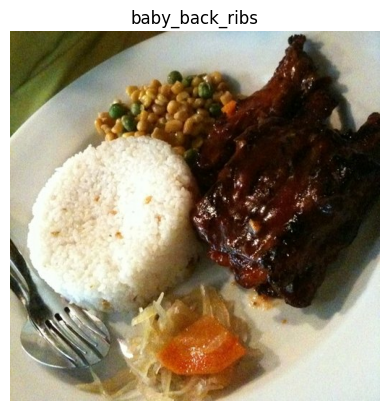

In [12]:
title = class_names[label.numpy()]

plt.imshow(image)
plt.title(title)
plt.axis('off')

#DATA PREPROCESSING AND EXPLORATORY

In [13]:
def preprocessing_image(image, label):
    image = tf.image.resize(image, size=[224, 224])
    return tf.cast(image, tf.float32), label

In [14]:
preprocessed_image = preprocessing_image(image, label)[0]
image_shape = image.shape
image_dtype = image.dtype
preprocessed_image_shape = preprocessed_image.shape
preprocessed_image_dtype = preprocessed_image.dtype
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image_shape},\nDatatype: {image_dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_image[:2]}...,\nShape: {preprocessed_image_shape},\nDatatype: {preprocessed_image_dtype}")

Image before preprocessing:
 [[[ 95  95  25]
  [ 87  87  17]
  [ 96  93  26]
  ...
  [178 189 191]
  [180 191 193]
  [178 189 191]]

 [[ 92  92  22]
  [ 86  86  16]
  [ 91  88  21]
  ...
  [183 194 196]
  [184 195 197]
  [180 191 193]]]...,
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[ 88.755104  88.755104  18.755102]
  [ 88.341835  85.341835  18.341835]
  [ 86.377556  81.16327   17.591837]
  ...
  [182.5153   193.5153   195.5153  ]
  [181.47958  192.47958  194.47958 ]
  [181.39784  192.39784  194.39784 ]]

 [[ 96.57143   93.57143   24.571428]
  [ 92.38265   89.38265   22.382656]
  [ 93.72959   88.515305  24.94388 ]
  ...
  [189.42863  200.42863  202.42863 ]
  [189.78568  200.78568  202.78568 ]
  [183.90295  197.90295  198.90295 ]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


(-0.5, 223.5, 223.5, -0.5)

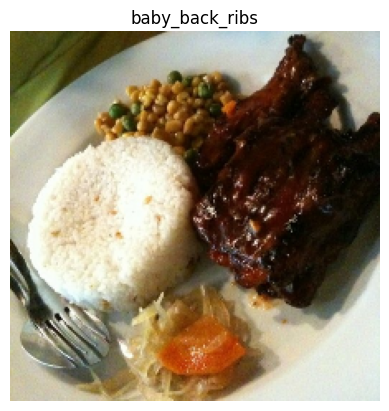

In [15]:
title = class_names[label]

plt.imshow(preprocessed_image/255.)
plt.title(title)
plt.axis('off')

In [16]:
buffer_size = 1000
batch_size = 32
autotune = tf.data.AUTOTUNE

In [17]:
train_data = train_data.map(map_func=preprocessing_image, num_parallel_calls=autotune)
train_data = train_data.shuffle(buffer_size=buffer_size).batch(batch_size=batch_size).prefetch(buffer_size=autotune)
validation_data = validation_data.map(map_func=preprocessing_image, num_parallel_calls=autotune)
validation_data = validation_data.shuffle(buffer_size=buffer_size).batch(batch_size=batch_size).prefetch(buffer_size=autotune)

In [18]:
train_data, validation_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

#Using Callbacks

In [19]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.75 and logs.get('val_accuracy')>0.75):
      print("\nReached more than 75% accuracy so cancelling training!")
      self.model.stop_training = True

In [20]:
checkpoint_path = "efficientNetB0_model_checkpoints" # save weights in .ckpt
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=1)

#DATA MODELLING

##Creating Base Model

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers.legacy import Adam

def create_efficientnetB0_model(input_shape=(224, 224, 3)):
    # Load the ResNet-50 model pre-trained on ImageNet data
    base_model = EfficientNetB0(include_top=False, input_shape=input_shape)
    base_model.trainable = False
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
    x = layers.Dense(len(class_names))(x)
    outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the model
model = create_efficientnetB0_model()

# Display the model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

##Feature Extraction

In [24]:
callbacks = myCallback()
history_101_food_feature_extraction = model.fit(train_data,
                                                epochs=5,
                                                steps_per_epoch=len(train_data),
                                                validation_data=validation_data,
                                                validation_steps=int(0.15*len(validation_data)),
                                                callbacks=[callbacks,
                                                           model_checkpoint])

Epoch 1/5
2368/2368 [==============================] - ETA: 0s - loss: 1.7171 - accuracy: 0.5832
Epoch 1: accuracy improved from -inf to 0.58321, saving model to efficientNetB0_model_checkpoints
2368/2368 [==============================] - 193s 78ms/step - loss: 1.7171 - accuracy: 0.5832 - val_loss: 1.1230 - val_accuracy: 0.6962
Epoch 2/5
2367/2368 [============================>.] - ETA: 0s - loss: 1.1996 - accuracy: 0.6893
Epoch 2: accuracy improved from 0.58321 to 0.68932, saving model to efficientNetB0_model_checkpoints
2368/2368 [==============================] - 191s 80ms/step - loss: 1.1996 - accuracy: 0.6893 - val_loss: 1.0293 - val_accuracy: 0.7142
Epoch 3/5
2367/2368 [============================>.] - ETA: 0s - loss: 1.0531 - accuracy: 0.7238
Epoch 3: accuracy improved from 0.68932 to 0.72375, saving model to efficientNetB0_model_checkpoints
2368/2368 [==============================] - 182s 76ms/step - loss: 1.0531 - accuracy: 0.7237 - val_loss: 1.0051 - val_accuracy: 0.7235
E

In [25]:
evaluation_validation_data_of_feature_extraction_model = model.evaluate(validation_data)

790/790 [==============================] - 58s 72ms/step - loss: 0.9774 - accuracy: 0.7343


In [26]:
evaluation_train_data_of_feature_extraction_model = model.evaluate(train_data)

2368/2368 [==============================] - 170s 70ms/step - loss: 0.7748 - accuracy: 0.7994


In [27]:
evaluation_validation_data_of_feature_extraction_model

[0.9773876070976257, 0.7342970371246338]

In [28]:
evaluation_train_data_of_feature_extraction_model

[0.7748123407363892, 0.7993927597999573]

##Fine-Tuning Model

In [29]:
for layer in model.layers:
  layer.trainable=True
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "float32">
pooling_layer True float32 <Policy "float32">
dense_1 True float32 <Policy "float32">
softmax_float32 True float32 <Policy "float32">


In [30]:
reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=5,
                                                 verbose=1,
                                                 min_lr=1e-7)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [31]:
history_101_food_fine_tuning = model.fit(train_data,
                                         epochs=5,
                                         steps_per_epoch=len(train_data),
                                         validation_data=validation_data,
                                         validation_steps=int(0.15*len(validation_data)),
                                         callbacks=[model_checkpoint,
                                                    callbacks,
                                                    reduce_learning_rate])

Epoch 1/5
2368/2368 [==============================] - ETA: 0s - loss: 0.7925 - accuracy: 0.7833
Epoch 1: accuracy improved from 0.76473 to 0.78334, saving model to efficientNetB0_model_checkpoints

Reached more than 75% accuracy so cancelling training!
2368/2368 [==============================] - 634s 249ms/step - loss: 0.7925 - accuracy: 0.7833 - val_loss: 0.8204 - val_accuracy: 0.7677 - lr: 1.0000e-04


In [32]:
evaluation_validation_data_of_fine_tuning_model = model.evaluate(validation_data)

790/790 [==============================] - 59s 72ms/step - loss: 0.8295 - accuracy: 0.7682


In [33]:
evaluation_validation_data_of_fine_tuning_model

[0.8294772505760193, 0.7682376503944397]

In [34]:
evaluation_train_data_of_fine_tuning_model = model.evaluate(train_data)

2368/2368 [==============================] - 169s 71ms/step - loss: 0.4999 - accuracy: 0.8678


In [35]:
evaluation_train_data_of_fine_tuning_model

[0.4998812973499298, 0.8677623867988586]

##Showing the plot of model

In [36]:
def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

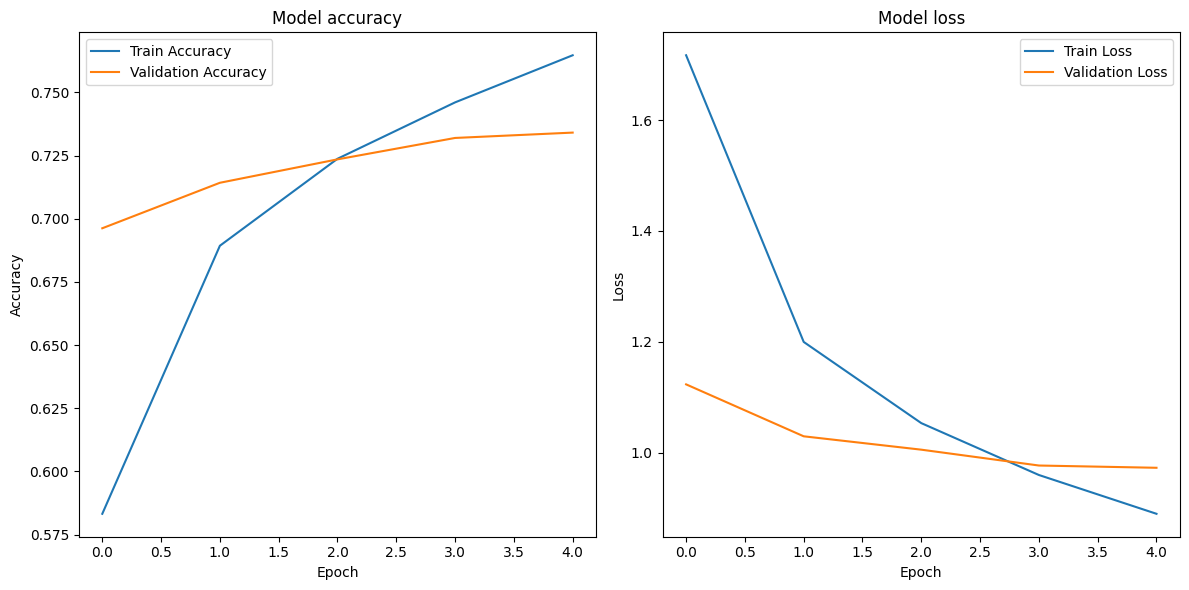

In [41]:
plot_metrics(history_101_food_feature_extraction)

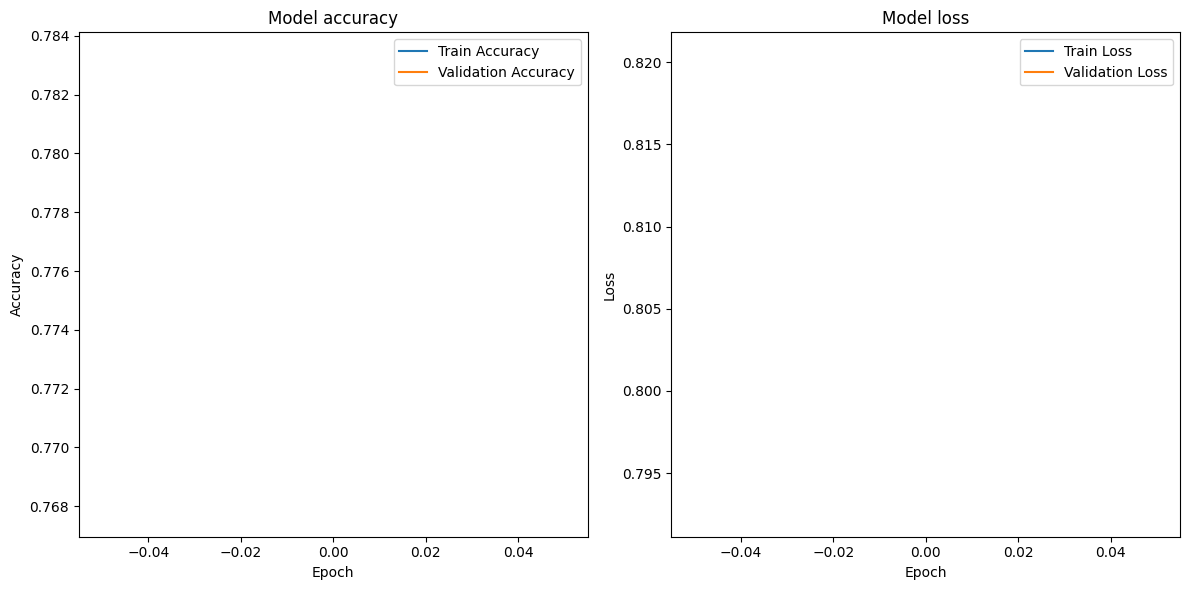

In [42]:
plot_metrics(history_101_food_fine_tuning)

##Save and Download The Model

In [37]:
model.save('food101_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
from tensorflow.keras.models import load_model

# Step 1: Install Required Libraries
# Uncomment the following lines if you haven't installed TensorFlow and h5py
# !pip install tensorflow
# !pip install h5py

# Step 2: Load the H5 Model
food101_model = load_model('food101_model.h5')  # Replace with the path to your H5 model file

# Step 3: Convert to TensorFlow Lite Model
converter = tf.lite.TFLiteConverter.from_keras_model(food101_model)
tflite_model = converter.convert()

# Step 4: Save the TensorFlow Lite Model
with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
from google.colab import files
files.download('converted_model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Citation

In [ ]:
@inproceedings{bossard14,
  title = {Food-101 -- Mining Discriminative Components with Random Forests},
  author = {Bossard, Lukas and Guillaumin, Matthieu and Van Gool, Luc},
  booktitle = {European Conference on Computer Vision},
  year = {2014}
}